# Analysis of Computer Science Conferences (ScimagoJR 2024)

## Objectives
- Explore bibliometric indicators of Computer Science conferences
- Identify key factors influencing conference impact (SJR)
- Compare Open Access and non-Open Access conferences
- Group conferences based on impact and productivity indicators

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics and ML
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Visualization settings
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

In [2]:
# Data loading

df = pd.read_csv("ScimagoJR-2024-CS-conf.csv", sep=';')
df.head()

,Rank,Sourceid,Title,Type,Issn,Publisher,Open Access,Open Access Diamond,SJR,SJR Best Quartile,...,Ref. / Doc.,%Female,Overton,SDG,Country,Region,Publisher.1,Coverage,Categories,Areas
0,1,24212,Proceedings of the IEEE Computer Society Confe...,conference and proceedings,10636919,IEEE Computer Society,No,No,"4,718",-,...,"59,55","25,18",0,68,United States,Northern America,IEEE Computer Society,"1992, 1994, 1996-2001, 2003-2004, 2006-2007, 2...",Computer Vision and Pattern Recognition; Software,Computer Science
1,2,110561,Proceedings of the IEEE International Conferen...,conference and proceedings,15505499,Institute of Electrical and Electronics Engine...,No,No,"3,544",-,...,"0,00","0,00",0,0,United States,Northern America,Institute of Electrical and Electronics Engine...,"1988, 1995, 1998-1999, 2001, 2003, 2005, 2007,...",Computer Vision and Pattern Recognition; Software,Computer Science
2,3,2300147402,Proceedings of the Annual ACM Symposium on The...,conference and proceedings,07378017,Association for Computing Machinery (ACM),No,No,"2,889",-,...,"43,13","14,76",0,0,United States,Northern America,Association for Computing Machinery (ACM),"1969-1982, 1984, 1988, 1991-1994, 1996, 2000, ...",Software,Computer Science
3,4,144853,Proceedings of the Annual International Sympos...,conference and proceedings,10724451,IEEE Computer Society,No,No,"2,229",-,...,"70,09","20,07",0,15,United States,Northern America,IEEE Computer Society,"1972-1976, 1978-1979, 1989-1991, 1994-2011, 20...",Engineering (miscellaneous); Hardware and Arch...,Computer Science; Engineering
4,5,26108,Proceedings - International Symposium on High-...,conference and proceedings,15300897,IEEE Computer Society,No,No,"2,216",-,...,"72,76","21,82",0,17,United States,Northern America,IEEE Computer Society,"1995-2014, 2016-2018, 2021-2024",Hardware and Architecture,Computer Science


In [3]:
# Data overview

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Rank                       359 non-null    int64 
 1   Sourceid                   359 non-null    int64 
 2   Title                      359 non-null    object
 3   Type                       359 non-null    object
 4   Issn                       359 non-null    object
 5   Publisher                  348 non-null    object
 6   Open Access                359 non-null    object
 7   Open Access Diamond        359 non-null    object
 8   SJR                        346 non-null    object
 9   SJR Best Quartile          359 non-null    object
 10  H index                    359 non-null    int64 
 11  Total Docs. (2024)         359 non-null    int64 
 12  Total Docs. (3years)       359 non-null    int64 
 13  Total Refs.                359 non-null    int64 
 14  Total Cita

,Rank,Sourceid,H index,Total Docs. (2024),Total Docs. (3years),Total Refs.,Total Citations (3years),Citable Docs. (3years),Overton,SDG
count,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,180.000000,1.611252e+10,39.582173,253.423398,756.050139,6710.164345,2055.732591,738.147632,0.072423,40.640669
std,103.778611,8.869523e+09,60.720978,1265.030114,3185.824465,26083.335210,11651.406288,3095.172106,0.569517,226.894277
min,1.000000,1.219300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.500000,2.000019e+10,8.000000,0.000000,74.000000,0.000000,32.000000,69.500000,0.000000,0.000000
50%,180.000000,2.110028e+10,20.000000,51.000000,156.000000,987.000000,136.000000,151.000000,0.000000,6.000000
75%,269.500000,2.110108e+10,41.000000,127.000000,365.000000,2913.000000,391.500000,358.000000,0.000000,20.000000
max,359.000000,2.110128e+10,601.000000,21817.000000,48703.000000,319631.000000,168132.000000,47633.000000,7.000000,3875.000000


In [4]:
# Check missing values
df.isna().sum()

# Convert numeric columns if needed
numeric_cols = ['SJR', 'H index', 'Total Docs. (3years)', 'Total Citations (3years)', 
                'Citations / Doc. (2years)', 'Ref. / Doc.', '%Female']
for col in numeric_cols:
    df[col] = (df[col].astype(str).str.replace(',', '.', regex=False).astype(float))

## Exploratory Data Analysis (EDA)

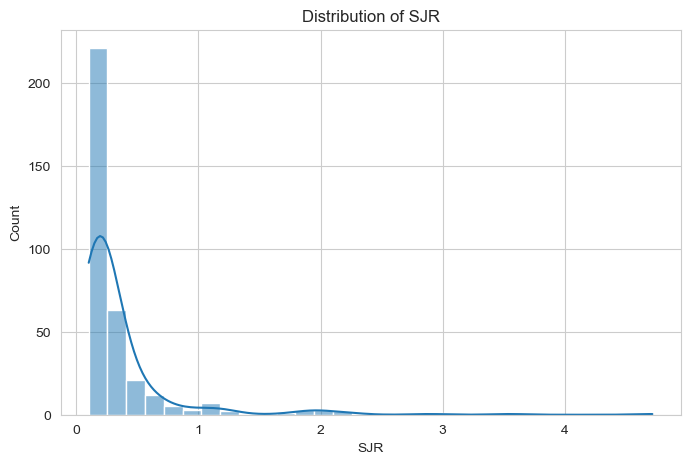

In [5]:
# Distribution of Key Indicators

sns.histplot(df['SJR'], bins=30, kde=True)
plt.title("Distribution of SJR")
plt.show()

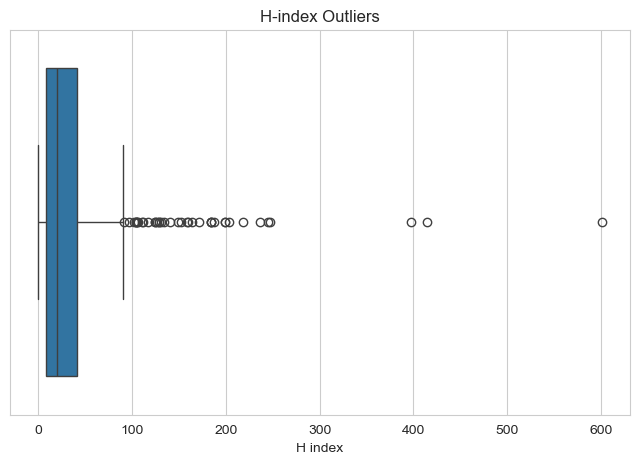

In [6]:
# Outlier Detection
sns.boxplot(x=df['H index'])
plt.title("H-index Outliers")
plt.show()

## Comparative Analysis

In [7]:
# Open Access vs Non-Open Access Conferences
df.groupby('Open Access')[['SJR', 'H index']].mean()

,SJR,H index
Open Access,,
No,0.34908,39.292264
Yes,0.26530,49.700000


In [8]:
# Regional Analysis
df.groupby('Region')['SJR'].mean().sort_values(ascending=False).head(10)

Region
Northern America    0.397182
Pacific Region      0.304500
Western Europe      0.203538
Eastern Europe      0.174091
Asiatic Region      0.142286
Latin America       0.112000
Name: SJR, dtype: float64

## Correlation Analysis

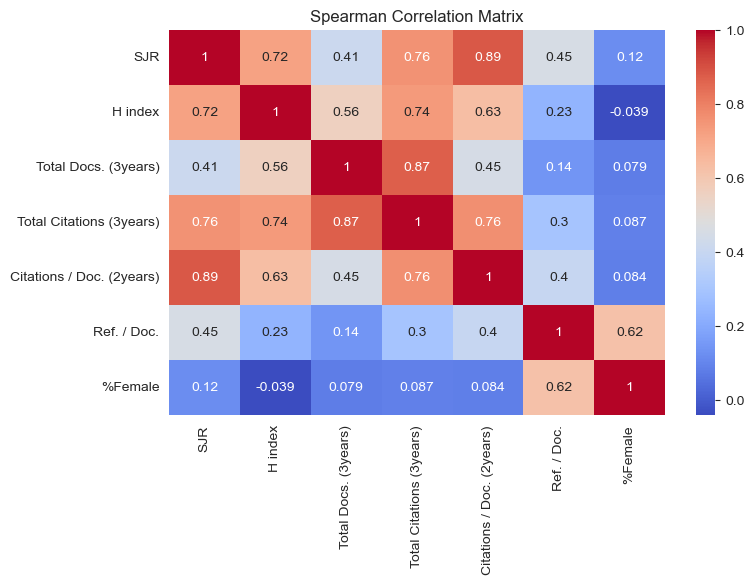

In [9]:
corr_matrix = df[numeric_cols].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

## Top Conferences by Impact

In [10]:
df[['Title', 'SJR', 'H index']].sort_values(by='SJR', ascending=False).head(10)

,Title,SJR,H index
0,Proceedings of the IEEE Computer Society Confe...,4.718,601.0
1,Proceedings of the IEEE International Conferen...,3.544,397.0
2,Proceedings of the Annual ACM Symposium on The...,2.889,129.0
3,Proceedings of the Annual International Sympos...,2.229,129.0
4,Proceedings - International Symposium on High-...,2.216,106.0
5,Proceedings - IEEE INFOCOM,2.061,245.0
6,Proceedings - IEEE Symposium on Security and P...,1.978,184.0
7,Proceedings of the ACM SIGMOD International Co...,1.959,184.0
8,Proceedings of the Annual ACM-SIAM Symposium o...,1.930,112.0
9,International Conference on Architectural Supp...,1.928,111.0


## Clustering Conferences

Conferences are grouped based on impact and productivity indicators.

In [11]:
features = ['SJR', 'H index', 'Citations / Doc. (2years)', 'Total Docs. (3years)']
X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X['Cluster'] = clusters
X.groupby('Cluster').mean()

,SJR,H index,Citations / Doc. (2years),Total Docs. (3years)
Cluster,,,,
0,0.240836,26.372240,0.798139,409.652997
1,1.388607,179.607143,5.016071,4838.500000
2,4.718000,601.000000,25.270000,6084.000000


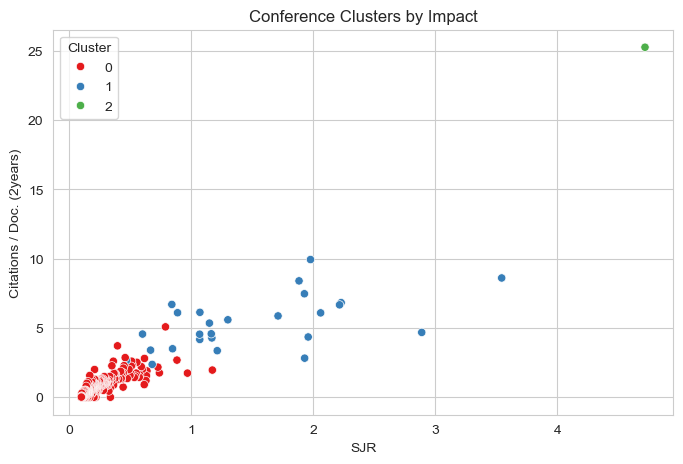

In [12]:
sns.scatterplot(
    x = X['SJR'],
    y = X['Citations / Doc. (2years)'],
    hue = X['Cluster'],
    palette = 'Set1'
)
plt.title("Conference Clusters by Impact")
plt.show()


## SDG and Societal Impact Analysis

This section explores SDG and Overton indicators if available.


In [13]:
df[['SDG', 'Overton']].describe()

,SDG,Overton
count,359.000000,359.000000
mean,40.640669,0.072423
std,226.894277,0.569517
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.000000,0.000000
75%,20.000000,0.000000
max,3875.000000,7.000000


## Key Findings

- SJR strongly correlates with H-index and citations per document
- Open Access conferences show comparable impact to non-OA conferences
- Three distinct clusters of conferences can be identified